<a href="https://colab.research.google.com/github/Code-CloudSG/CS506-Computational-Tools-for-Data-Science/blob/master/R_environment_how_to_add_p_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(ggpubr)
library(rstatix)

Loading required package: ggplot2


Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter




In [ ]:
 https://colab.to/r

In [ ]:
install.packages("ggpubr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’, ‘Rcpp’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’




In [ ]:
rstatix

In [ ]:
# Transform `dose` into factor variable
df <- ToothGrowth
df$dose <- as.factor(df$dose)
head(df, 3)

,len,supp,dose
,<dbl>,<fct>,<fct>
1,4.2,VC,0.5
2,11.5,VC,0.5
3,7.3,VC,0.5


In [ ]:
# Statistical test
stat.test <- df %>%
  t_test(len ~ supp) %>%
  add_significance()
stat.test

.y.,group1,group2,n1,n2,statistic,df,p,p.signif
<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
len,OJ,VC,30,30,1.915268,55.30943,0.0606,ns


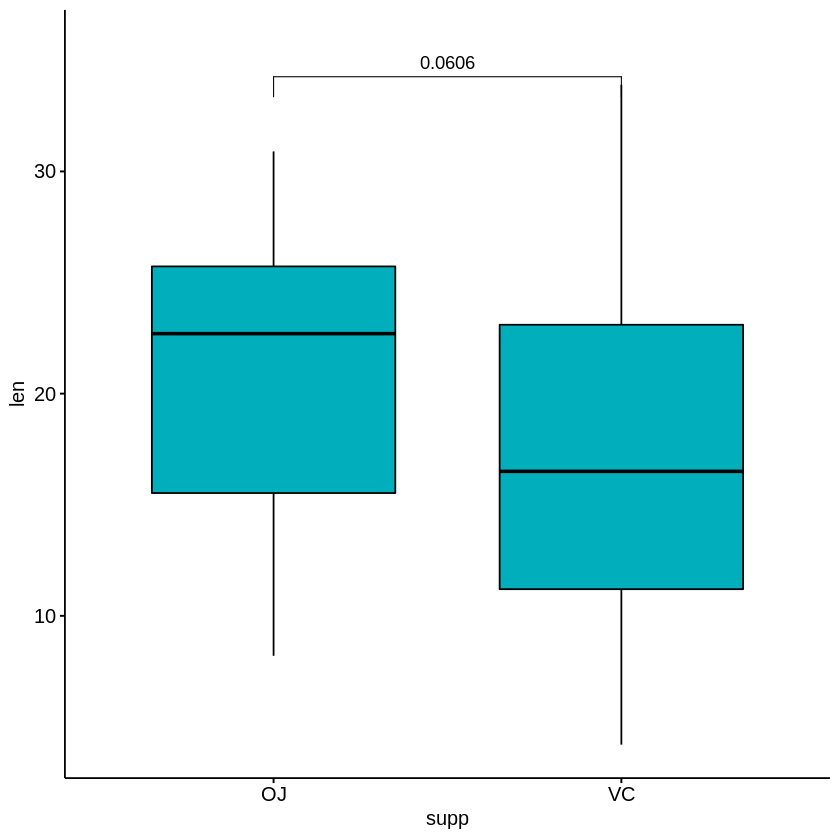

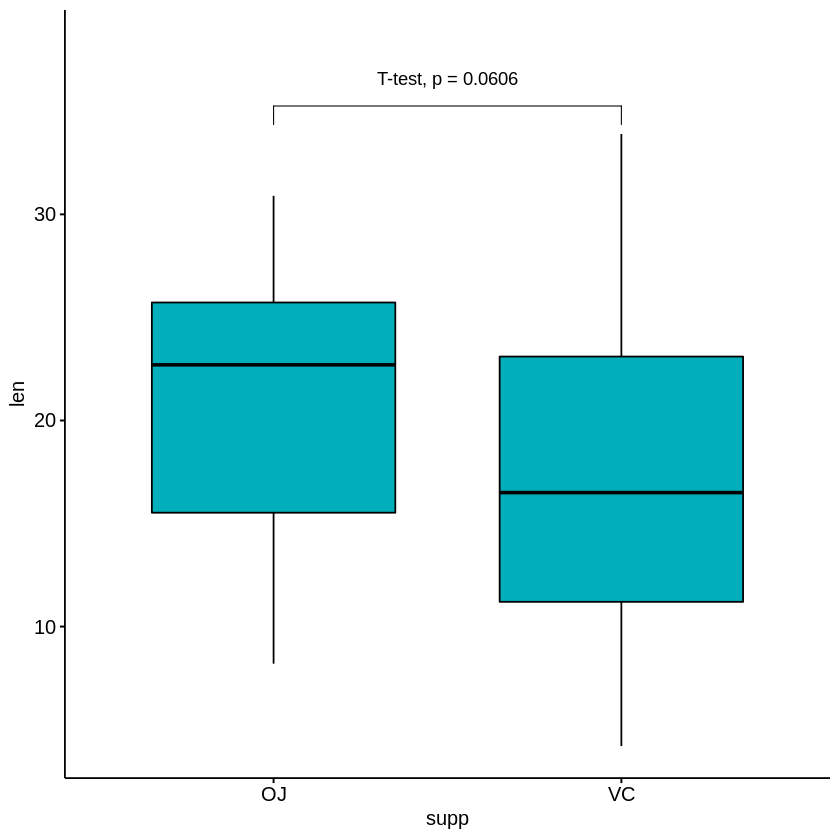

In [ ]:
# Box plots with p-values
bxp <- ggboxplot(df, x = "supp", y = "len", fill = "#00AFBB")
stat.test <- stat.test %>% add_xy_position(x = "supp")
bxp + 
  stat_pvalue_manual(stat.test, label = "p") +
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.1)))

# Customize p-value labels using glue expression 
# https://github.com/tidyverse/glue
bxp + stat_pvalue_manual(
  stat.test, label = "T-test, p = {p}",
  vjust = -1, bracket.nudge.y = 1
  ) +
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.15)))

In [ ]:
# Statistical test
stat.test <- df %>%
  group_by(dose) %>%
  t_test(len ~ supp) %>%
  adjust_pvalue() %>%
  add_significance("p.adj")
stat.test

dose,.y.,group1,group2,n1,n2,statistic,df,p,p.adj,p.adj.signif
<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.5,len,OJ,VC,10,10,3.1697328,14.96875,0.00636,0.01272,*
1,len,OJ,VC,10,10,4.0327696,15.35767,0.00104,0.00312,**
2,len,OJ,VC,10,10,-0.0461361,14.03982,0.96400,0.96400,ns


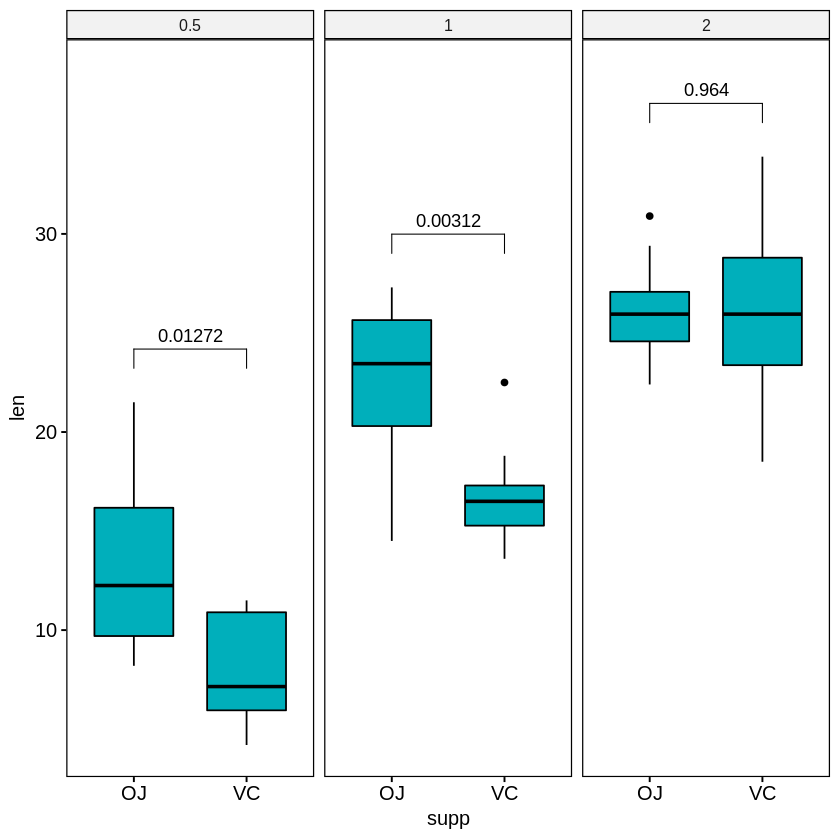

In [ ]:
# Box plots with p-values
stat.test <- stat.test %>% add_xy_position(x = "supp")
bxp <- ggboxplot(df, x = "supp", y = "len", fill = "#00AFBB",
                 facet.by = "dose")
bxp + 
  stat_pvalue_manual(stat.test, label = "p.adj") +
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.10)))

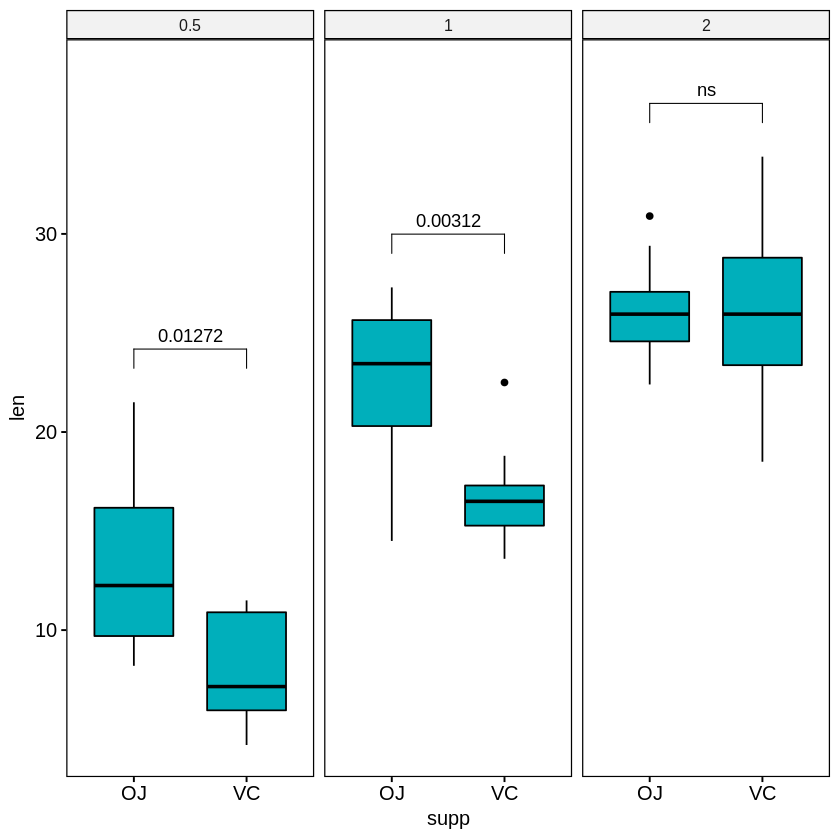

In [ ]:
# Add a custom label column
# showing adjusted p-values if significant otherwise "ns" 
stat.test <- stat.test %>% add_xy_position(x = "supp")
stat.test$custom.label <- ifelse(stat.test$p.adj <= 0.05, stat.test$p.adj, "ns")

# Visualization
bxp + 
  stat_pvalue_manual(stat.test, label = "custom.label") +
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.10)))


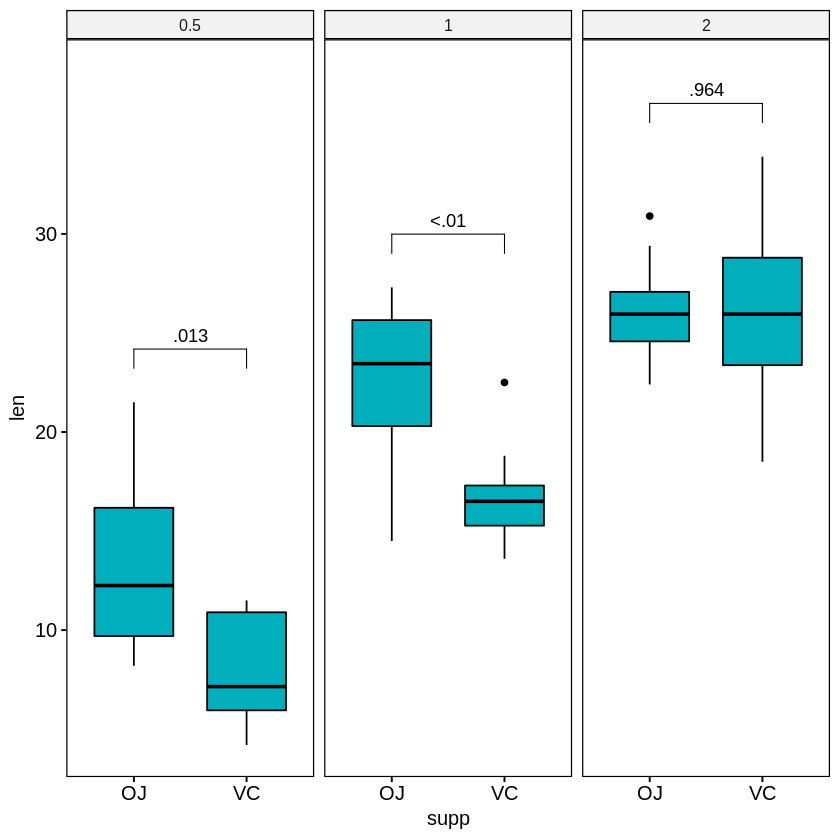

In [ ]:
stat.test <- stat.test %>% add_xy_position(x = "supp")
stat.test$p.format <- p_format(
  stat.test$p.adj, accuracy = 0.01,
  leading.zero = FALSE
  )
# Visualization
bxp + 
  stat_pvalue_manual(stat.test, label = "p.format") +
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.10)))

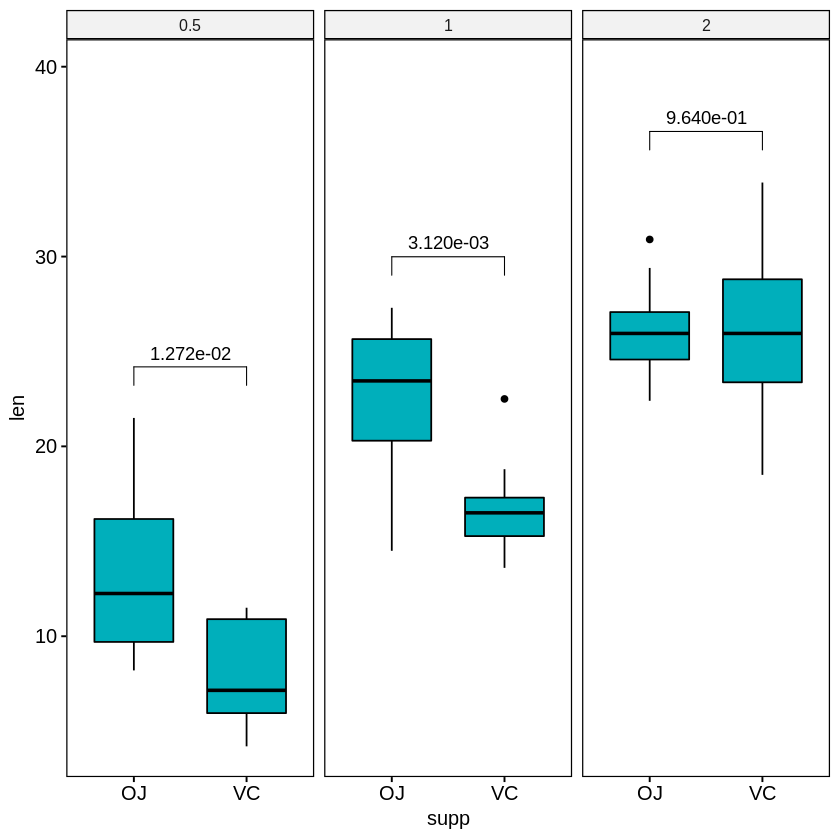

In [ ]:
# Format p-values into scientific format
stat.test <- stat.test %>% add_xy_position(x = "supp")
stat.test$p.scient <- format(stat.test$p.adj, scientific = TRUE)
bxp + 
  stat_pvalue_manual(stat.test, label = "p.scient") +
   scale_y_continuous(expand = expansion(mult = c(0.05, 0.15)))

In [ ]:
# Statistical test
stat.test <- df %>%
  t_test(len ~ supp, paired = TRUE) %>%
  add_significance()
stat.test

.y.,group1,group2,n1,n2,statistic,df,p,p.signif
<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
len,OJ,VC,30,30,3.302585,29,0.00255,**


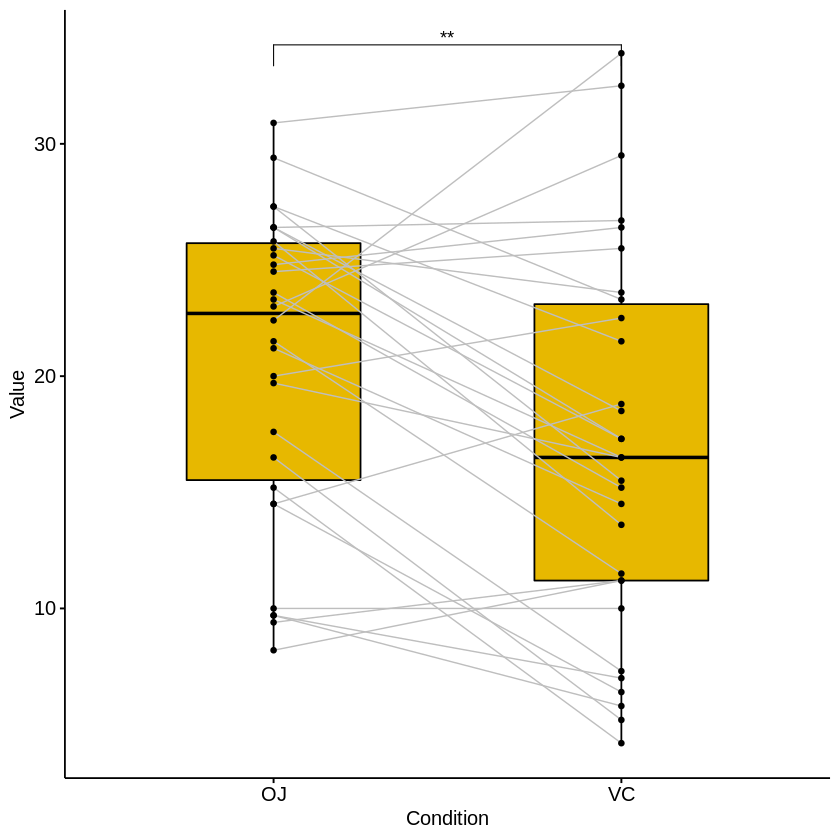

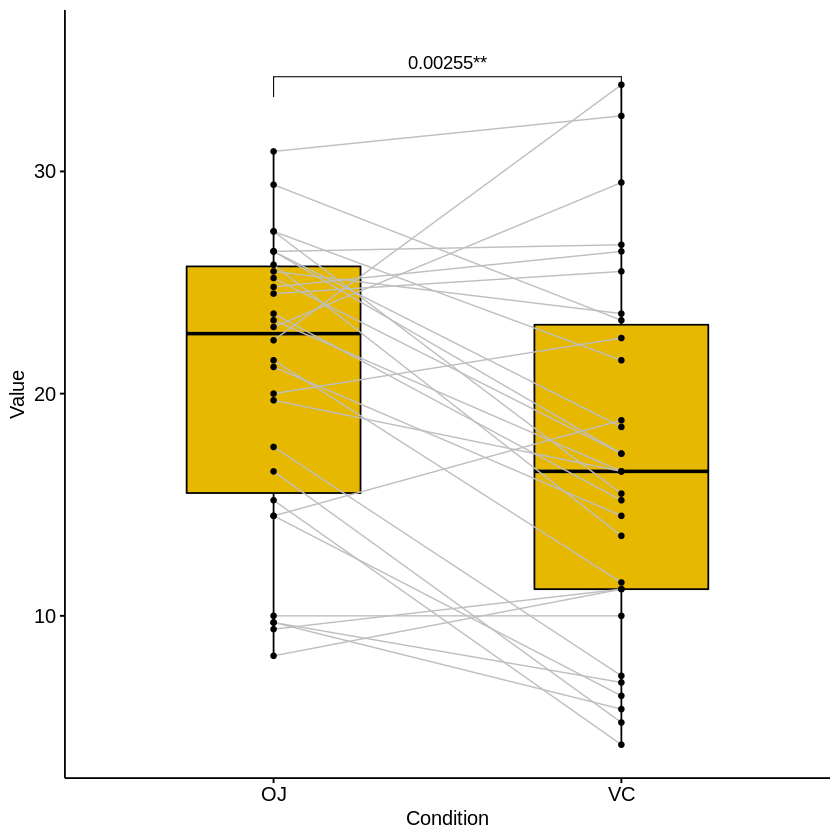

In [ ]:
# Box plots with p-values
bxp <-  ggpaired(df, x = "supp", y = "len", fill = "#E7B800",
                 line.color = "gray", line.size = 0.4)
stat.test <- stat.test %>% add_xy_position(x = "supp")
bxp + stat_pvalue_manual(stat.test, label = "p.signif")

# Show the p-value combined with the significance level
bxp + 
  stat_pvalue_manual(stat.test, label = "{p}{p.signif}") +
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.10)))

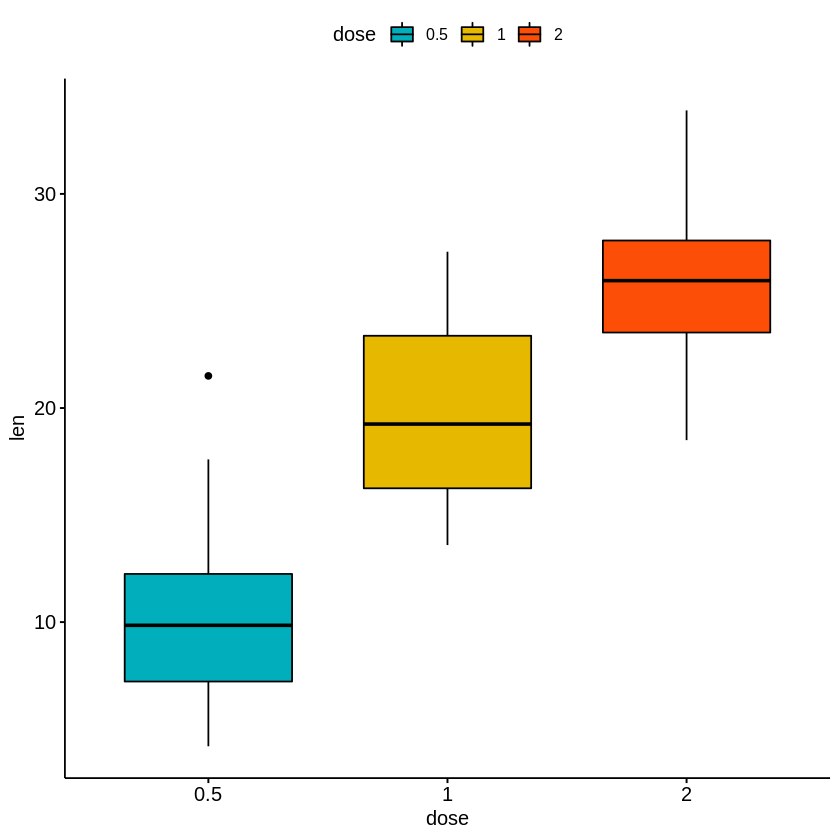

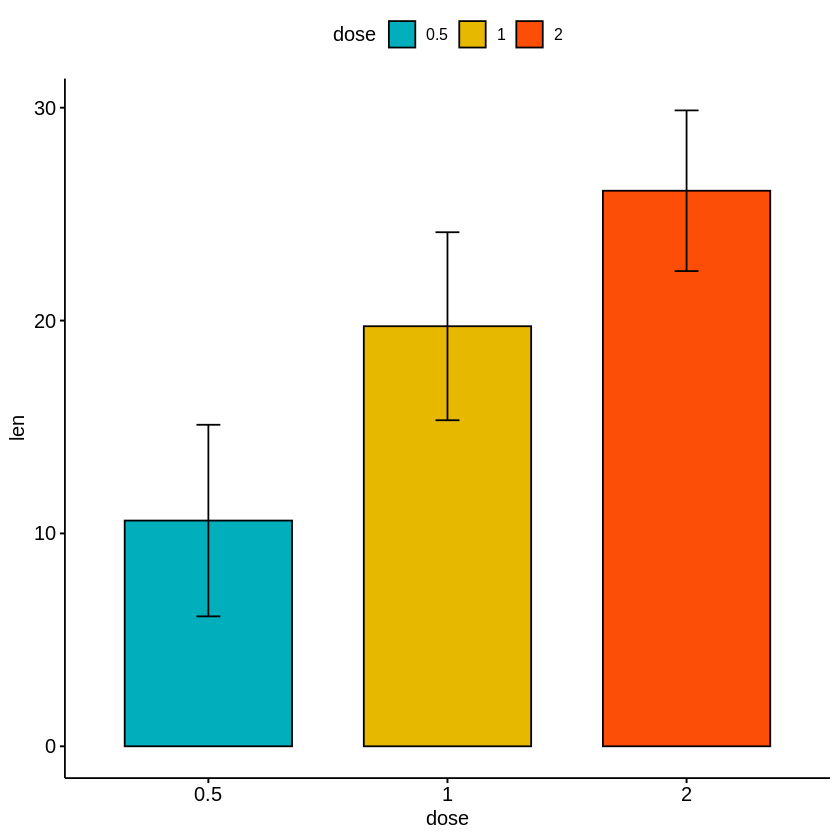

In [ ]:
# Box plots
bxp <- ggboxplot(df, x = "dose", y = "len", fill = "dose", 
                 palette = c("#00AFBB", "#E7B800", "#FC4E07"))
bxp
# Bar plots showing mean +/- SD
bp <- ggbarplot(df, x = "dose", y = "len", add = "mean_sd", fill = "dose", 
                palette = c("#00AFBB", "#E7B800", "#FC4E07"))
bp

In [ ]:
stat.test <- df %>% t_test(len ~ dose)
stat.test

,.y.,group1,group2,n1,n2,statistic,df,p,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,len,0.5,1,20,20,-6.476648,37.98641,1.27e-07,2.54e-07,****
2,len,0.5,2,20,20,-11.799046,36.88259,4.40e-14,1.32e-13,****
3,len,1,2,20,20,-4.900484,37.10109,1.91e-05,1.91e-05,****


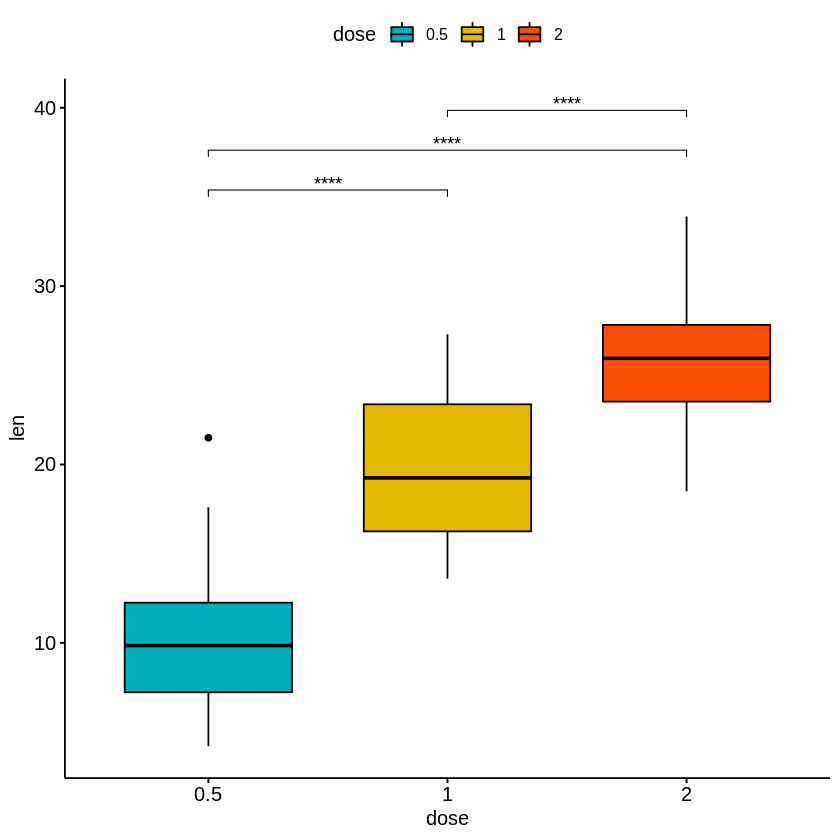

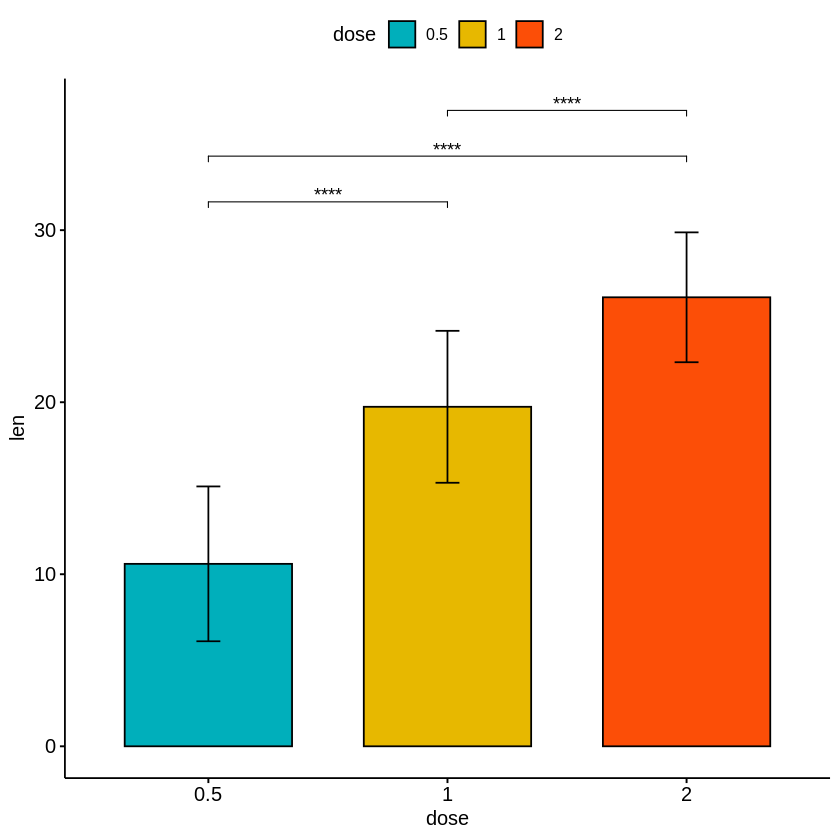

In [ ]:
# Box plot
stat.test <- stat.test %>% add_xy_position(x = "dose")
bxp + stat_pvalue_manual(stat.test, label = "p.adj.signif", tip.length = 0.01)

# Bar plot
stat.test <- stat.test %>% add_xy_position(fun = "mean_sd", x = "dose")
bp + stat_pvalue_manual(stat.test, label = "p.adj.signif", tip.length = 0.01)

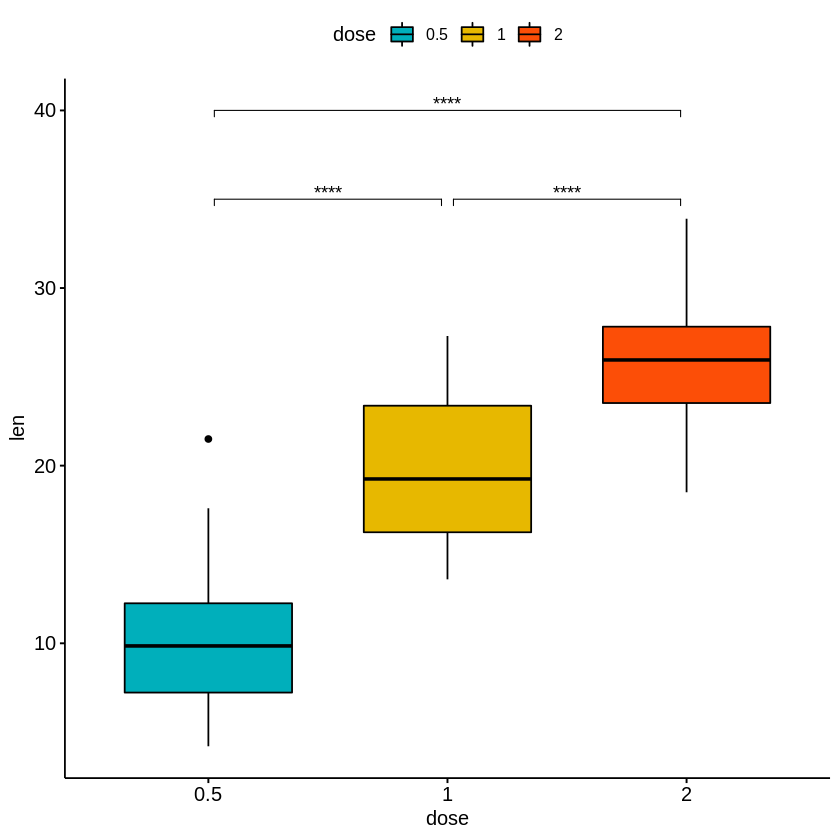

In [ ]:
bxp + 
  stat_pvalue_manual(
    stat.test, label = "p.adj.signif", tip.length = 0.01,
    y.position = c(35, 40, 35), bracket.shorten = 0.05
    )

In [ ]:
# Statistical tests
stat.test <- df %>% t_test(len ~ dose, ref.group = "0.5") 
stat.test

,.y.,group1,group2,n1,n2,statistic,df,p,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,len,0.5,1,20,20,-6.476648,37.98641,1.27e-07,1.27e-07,****
2,len,0.5,2,20,20,-11.799046,36.88259,4.40e-14,8.80e-14,****


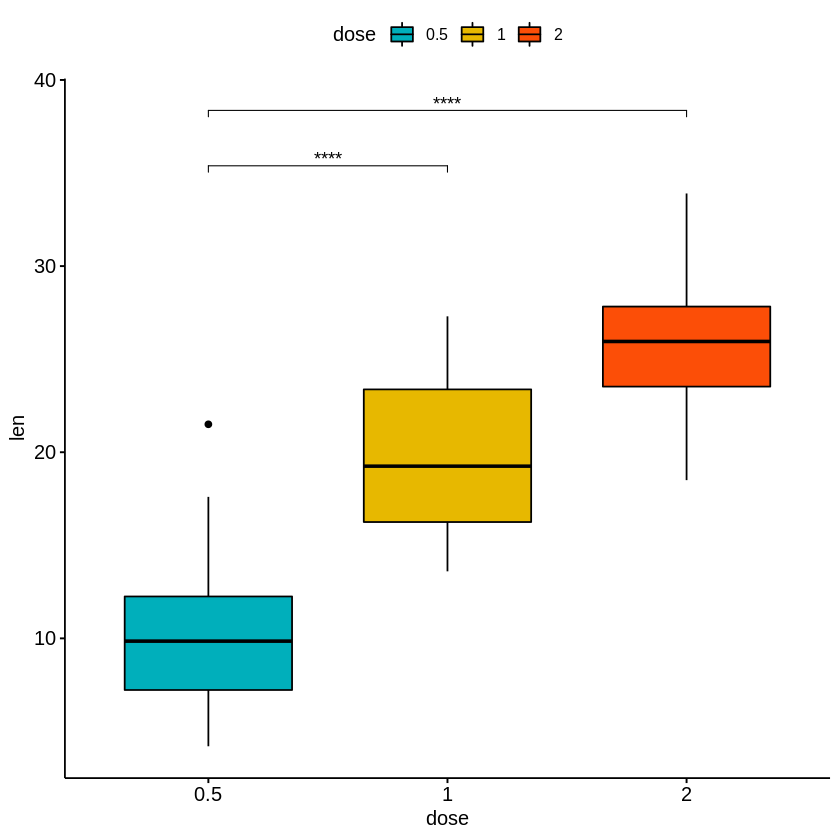

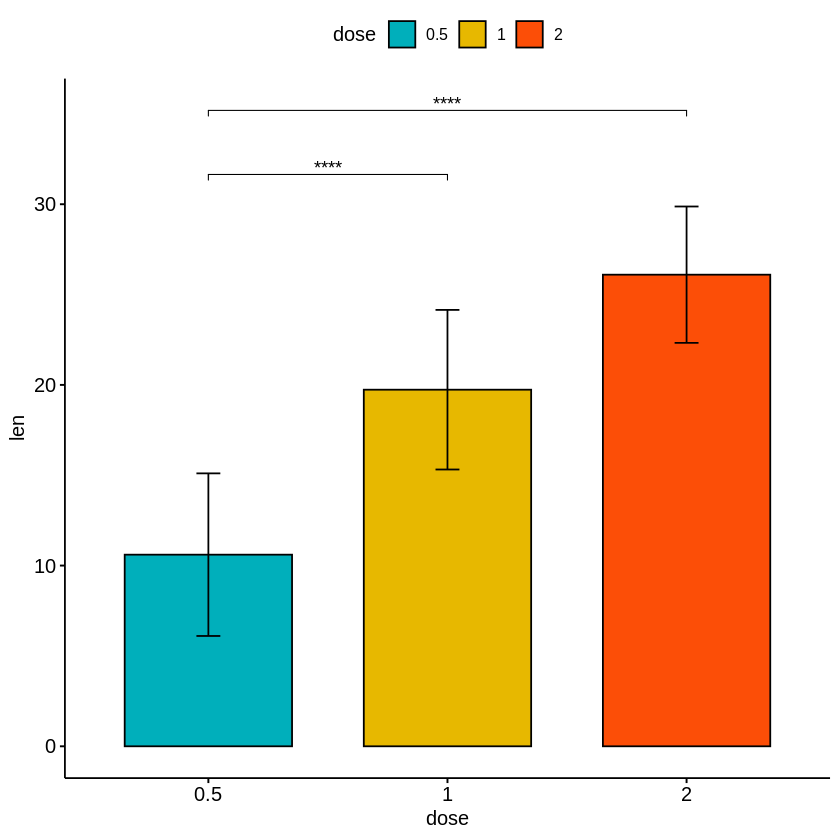

In [ ]:
# Box plot
stat.test <- stat.test %>% add_xy_position(x = "dose")
bxp + stat_pvalue_manual(stat.test, label = "p.adj.signif", tip.length = 0.01)

# Bar plot
stat.test <- stat.test %>% add_xy_position(fun = "mean_sd", x = "dose")
bp + stat_pvalue_manual(stat.test, label = "p.adj.signif", tip.length = 0.01)